# 采用糖尿病数据集测试

In [39]:
from sklearn import datasets  # 导入内置数据集模块
from sklearn.model_selection import train_test_split  # 导入数据集切分模块
from sklearn.linear_model import LinearRegression
import numpy as np  # 导入数值计算模块
import warnings

diabetes = datasets.load_diabetes()  # 载入糖尿病数据集

diabetes_feature = diabetes.data[:, np.newaxis, 2]  # 该数据集的特征较多，这里只选取其中一个
diabetes_target = diabetes.target  # 设定目标值

# 切分数据集为 70% 的训练集和 30% 的预测集
# random_state 随机数种子用于保证每次执行结果一致
train_feature, test_feature, train_target, test_target = train_test_split(
    diabetes_feature, diabetes_target, test_size=0.3, random_state=56)

分割数据集之后，构建最小二成线性回归模型进行数据训练

In [40]:
model = LinearRegression()  # 构建最小二乘线性回归模型
model.fit(train_feature, train_target)  # 使用训练集数据训练模型

LinearRegression()

使用测试集进行预测

In [41]:
yuce = model.predict(test_feature)
yuce.shape

(133,)

将结果绘图

Text(0.5, 1.0, 'LinearRegression Example')

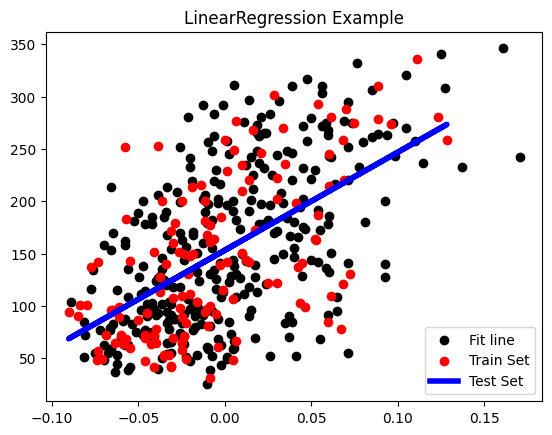

In [42]:
import matplotlib.pyplot as plt  # 导入 matplotlib 绘图模块
%matplotlib inline

# 绘图
plt.scatter(train_feature, train_target,  color='black')  # 绘制训练集散点图
plt.scatter(test_feature, test_target,  color='red') # 绘制测试集散点图
plt.plot(test_feature, yuce,
         color='blue', linewidth=4)  # 绘制拟合直线

# 绘制图例
plt.legend(('Fit line', 'Train Set', 'Test Set'), loc='lower right')
plt.title('LinearRegression Example')

## 感知机

展示感知机分类过程

In [43]:
from sklearn.datasets import make_classification  # 导入分类数据生成模块

# 随机生成一组可以被二分类的数据
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1, random_state=1)

X.shape, y.shape  # 查看数组形状from sklearn.datasets import make_classification  # 导入分类数据生成模块

# 随机生成一组可以被二分类的数据
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1, random_state=1)

X.shape, y.shape  # 查看数组形状

((100, 2), (100,))

#### 将结果绘制出来


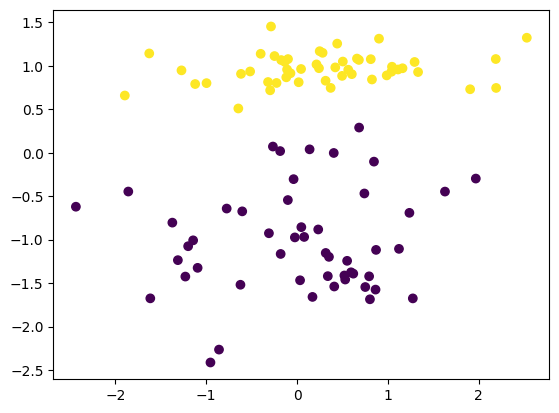

In [44]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)  # 绘制数据集散点图

#### 明显可以看到有线性的界限 那么

In [45]:
from sklearn.linear_model import Perceptron

# 将数据集划分为 70% 训练集和 30% 测试集
train_feature, test_feature, train_target, test_target = train_test_split(
    X, y, test_size=0.3, random_state=56)
# 建立感知机模型，使用默认参数
model = Perceptron()
# 使用训练集训练模型
model.fit(train_feature, train_target)

Perceptron()

#### 进行模型训练

In [46]:
preds = model.predict(test_feature)  # 使用测试集预测

#### 预测结果是preds 而真实结果是test_traget 使用accuracy_score来计算精准度

In [47]:
from sklearn.metrics import accuracy_score

jingzhundu = accuracy_score(test_target, preds)  # 先传入真实值，再传入预测值
jingzhundu

1.0

将训练数据和测试数据都绘制在图像上，并绘制出感知分类时的决策边界

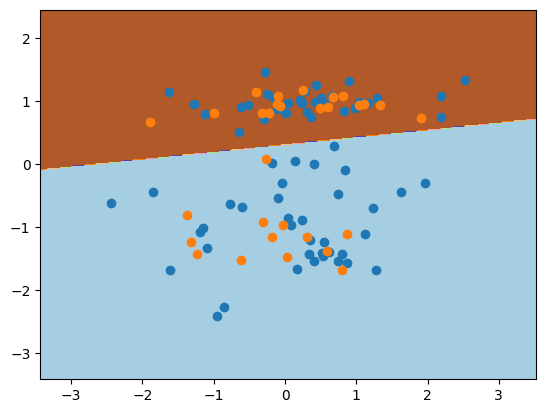

In [48]:
# 创建一个绘图矩阵方便显示决策边界线
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

fig, ax = plt.subplots()
# 绘制决策边界
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# 绘制训练和测试数据
ax.scatter(train_feature[:, 0], train_feature[:, 1])
ax.scatter(test_feature[:, 0], test_feature[:, 1])

## 支持向量机

### 导入pandas模块 读点数据

In [50]:
import pandas as pd  # 导入 pandas 模块
import warnings
warnings.filterwarnings('ignore')

# 读取 csv 数据文件
df = pd.read_csv(
    "https://labfile.oss.aliyuncs.com/courses/866/data.csv", header=0)
df.head()

,x,y,class
0,0.178681,0.300682,0
1,0.202033,0.320188,0
2,0.175568,0.290042,0
3,0.156886,0.284722,0
4,0.144432,0.302455,0


### 将数据分为训练集和测试集

In [51]:
from sklearn.model_selection import train_test_split  # 导入数据集划分模块

# 读取特征值及目标值
feature = df[["x", "y"]]
target = df["class"]

# 对数据集进行分割
train_feature, test_feature, train_target, test_target = train_test_split(
    feature, target, test_size=0.3)


In [ ]:
from sklearn.svm import LinearSVC  # 导入线性支持向量机分类器

# 构建线性支持向量机分类模型
model_svc = LinearSVC()
model_svc.fit(train_feature, train_target)